# Assessment (AT)

**Disponível também em:**<br>
https://drive.google.com/file/d/1JuZvy7WCHMxEcbI_vyPIKpz1LoDNLi4j<br>
https://github.com/NKIdehara/Inteligencia_Artificial_e_Machine_Learning/blob/main/nelson_idehara_DR1_AT.ipynb

In [1]:
# Configurações iniciais
!pip install ucimlrepo

## Questão 1

A. O trabalho começa pela compreensão do problema e pelo reconhecimento do papel do aprendizado supervisionado neste cenário. Nesta etapa, você deve demonstrar domínio conceitual e capacidade de contextualização técnica do problema de predição de risco de diabetes. Para isso, responda aos itens a seguir:

B. Justifique tecnicamente por que o problema em questão deve ser tratado como uma tarefa de classificação supervisionada, considerando a presença da variável-alvo (Diabetes_binary) e a natureza das variáveis explicativas disponíveis na base de dados.

C. Identifique e discuta ao menos dois desafios relevantes para a aplicação de modelos de aprendizado supervisionado neste conjunto de dados, como por exemplo: necessidade de normalização, variáveis com baixa variância, ou possível desequilíbrio entre classes.

D. Liste e explique o uso das principais bibliotecas utilizadas no desenvolvimento do seu pipeline (por exemplo: Scikit-Learn, NumPy, Matplotlib, etc.), descrevendo brevemente o papel de cada uma no processo de modelagem.


***RESPOSTA (B)*** $\Rightarrow$ A classificação supervisionada funciona com dados de entrada e saída identificados (rotulados) para o treinamento dos modelos, de forma que dado um conjunto de entrada e saída (variável-alvo) conhecido obtém-se um modelo de previsão de saída para novos dados de entrada. A classificação não-supervisionada não utiliza rótulos, ou seja, o modelo precisa encontrar padrões dentro dos dados de entrada. Por isso o problema em questão é uma classificação supervisionada, pois possui dados de entrada rotulados (os registros anonimizados) e dados de saída (variável-alvo Diabetes_binary).

***RESPOSTA (C)*** $\Rightarrow$ Alguns dos desafios para a aplicação de modelos de aprendizado supervisionado no conjunto de dados CDC Behavioral Risk Factor Surveillance são:
- Viés da amostragem: os dados coletados podem não representar a realidade da população, pois não se sabe como foi a coleta dos dados e a metodologia utilizada, onde pode ter havido omissão ou falta de acurácia nas respostas.
- Normalização: o conjunto de dados apresenta diferentes categorias e dimensões que podem ser distorcidas quando a normalização é aplicada.
- Desiquilíbrio entre classes: as classes com categorias que aparecem com mais frequência (por exemplo muitos registros de pessoas sem diabetes e poucos com diabetes) tendem a tornar as outras classes menos importantes no modelo.


***RESPOSTA (D)*** $\Rightarrow$ O desenvolvimento do pipeline segue a seguinte estrutura, com as respectivas bibliotecas utilizadas:
- Carregar os dados: os dados utilizados pelos algoritmos são no formato de dataframe (estrutura em forma de tabela), geradas com o uso da biblioteca Pandas.
- Pré-processamento: o tratamento dos dados (como normalização) pode ser feito com as funções StandardScaler ou MinMaxScaler da biblioteca Scikit-Learn, que transformam os dados para que as variáveis possam contribuir de forma equilibrada no modelo.
- Dividir entre treino e teste: a função train_test_split da biblioteca Scikit-Learn separa os dados em dados de treino e dados de teste do modelo.
- Treinar o modelo: para o problema em questão, o algoritmo a ser utilizado é oriunda da função KNeighborsClassifier da biblioteca Scikit-Learn.
- Avaliar o modelo: com a criação do modelo, utilizam-se as funções da biblioteca Scikit-Learn como accuracy_score ou precision_score para avaliar o desempenho do modelo.


## Questão 2

A. Carregue a base de dados corretamente, identifique a variável-alvo e selecione as variáveis explicativas que serão utilizadas no modelo, apresentando uma justificativa concisa para suas escolhas.

B. Realize a separação entre os conjuntos de treino e teste utilizando uma estratégia que preserve a proporção entre as classes (stratification). Descreva como essa separação foi feita e por que ela é importante neste caso.

C. Aplique normalização nas variáveis numéricas, explicando por que essa etapa é necessária para o funcionamento adequado do KNN.

D. Treine o modelo, realize predições sobre o conjunto de teste e avalie o desempenho inicial do classificador. Em seguida, analise como a variação do parâmetro K afeta o desempenho do modelo, e discuta qual valor foi escolhido para sua versão final e por quê.


In [2]:
# ********************************************************************************
# ***                               RESPOSTA (A)                               ***
# ********************************************************************************
# Dados obtidos de https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators
# Para carregar os dados, utilizou-se a função fetch_ucirepo da biblioteca ucimlrepo
#    para obter os dados do dataset CDC Behavioral Risk Factor Surveillance.
from ucimlrepo import fetch_ucirepo
doencas_cronicas = fetch_ucirepo(id=891)

# Variáveis explicativas
# Foram selecionadas todas as variáveis explicativas para saber o comportamento do modelo
#   e analisar posteriormente o impacto na escolha de variáveis na acurácia.
features = doencas_cronicas.data.features

# Variável-alvo (target): diagnóstico de diabetes
target = doencas_cronicas.data.targets


# ********************************************************************************
# ***                               RESPOSTA (B)                               ***
# ********************************************************************************
from sklearn.model_selection import train_test_split

# Parâmetro de controle da aleatoriedade
ALEATORIO = 11

# Separação entre conjunto de treinamento e teste é feita com a função train_test_split
#   da biblioteca Scikit-Learn. Foi definido um parâmetro (TAMANHO_TESTE) que indica o percentual
#   de dados que serão utilizados para teste (20%). O restante é o percentual para treinamento.
# A separação com esta função gera uma amostragem aleatória de treinamento e teste, permitindo avaliar
#   o desempenho do modelo em dados que não foram utilizados no treinamento.
TAMANHO_TESTE = 0.2
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=TAMANHO_TESTE, random_state=ALEATORIO, stratify=target)


# ********************************************************************************
# ***                               RESPOSTA (C)                               ***
# ******************************************************************************** 
# O algorítmo KNN utiliza a distância entre os vizinhos mais próximos. Se estas distâncias
#   possuirem escalas diferentes, as variáveis com escalas maiores terão peso maior nos
#   resultados do modelo.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_train_scaled = scaler.fit_transform(feature_train)
feature_test_scaled = scaler.transform(feature_test)


# ********************************************************************************
# ***                               RESPOSTA (D)                               ***
# ********************************************************************************
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Avaliação do modelo com K=5
K = 5
model = KNeighborsClassifier(n_neighbors=K)
model.fit(feature_train_scaled, target_train.values.ravel())
target_pred = model.predict(feature_test_scaled)
accuracy = accuracy_score(target_test, target_pred)
print("Acurácia com K=5:", accuracy)

# Variando-se o valor de K para avaliar o desempenho do modelo
# -> escolha do melhor K ao final
melhor_k = 0
melhor_accuracy = 0
for k in range(1, 1001, 1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(feature_train_scaled, target_train.values.ravel())
    target_pred = model.predict(feature_test_scaled)
    accuracy = accuracy_score(target_test, target_pred)
    print(f"Acurácia com K={k}: {accuracy}")
    if accuracy > melhor_accuracy:
        melhor_accuracy = accuracy
        melhor_k = k
print(f"\nMelhor acurácia com K={melhor_k}: {melhor_accuracy}")

Acurácia com K=5: 0.8459870703248187
Acurácia com K=1: 0.8057986439608956
Acurácia com K=2: 0.8516240933459477
Acurácia com K=3: 0.8355999684642069
Acurácia com K=4: 0.8538513087354147
Acurácia com K=5: 0.8459870703248187
Acurácia com K=6: 0.8562164932198045
Acurácia com K=7: 0.8515255439924314
Acurácia com K=8: 0.858167770419426
Acurácia com K=9: 0.8552901292967519
Acurácia com K=10: 0.8589758751182592
Acurácia com K=11: 0.856413591926837
Acurácia com K=12: 0.8598233995584988
Acurácia com K=13: 0.8583451592557553
Acurácia com K=14: 0.8606709239987386
Acurácia com K=15: 0.8596263008514664
Acurácia com K=16: 0.8614790286975718
Acurácia com K=17: 0.8602767265846736
Acurácia com K=18: 0.8615578681803847
Acurácia com K=19: 0.8600796278776411
Acurácia com K=20: 0.8615184484389783
Acurácia com K=21: 0.860631504257332
Acurácia com K=22: 0.8622674235257016
Acurácia com K=23: 0.8608483128350678
Acurácia com K=24: 0.861498738568275
Acurácia com K=25: 0.8610651214128036
Acurácia com K=26: 0.86201

***RESPOSTA (D)*** $\Rightarrow$ Variando-se o valor de K de 1 até 999, foi encontrado um valor ótimo de k=109 que maximiza a acurácia. Verificou-se que um valor de k muito baixo causa overfitting, ou seja, o modelo fica muito sensível a variações dos dados de entrada. Por outro lado, um valor de k muito alto causa underfitting, ou seja, o modelo fica com um viés muito alto.

Foi escolhido então o valor de K=109 para o modelo KNN por apresentar a melhor acurácia para o parâmetro de aleatoriedade 11.

## Questão 3

A. Aplique validação cruzada ao modelo KNN, explicando a estratégia adotada (número de dobras, métrica utilizada e justificativa para as escolhas). Comente como a validação cruzada contribui para estimar o desempenho real do modelo.

B. Implemente ao menos um modelo adicional de classificação (por exemplo, regressão logística ou árvore de decisão) e aplique o mesmo processo de validação cruzada, mantendo os critérios de avaliação consistentes.

C. Compare os modelos com base nos resultados obtidos na validação cruzada. Apresente os resultados em formato tabular ou gráfico e destaque qual modelo apresentou desempenho mais estável ou consistente.

D. Com base nos resultados da validação, discuta brevemente se há indícios de overfitting ou underfitting em algum dos modelos testados, relacionando os achados com os conceitos de viés, variância e complexidade do modelo.


Acurácia por fold (KNN): [0.86378083 0.86331272 0.86419966 0.86385474 0.86441805]
Acurácia média (validação cruzada, KNN): 0.8639132002170765
Acurácia no conjunto de teste (KNN): 0.864435509303059


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in


Acurácia por fold (Regressão Logística): [0.86368228 0.86378083 0.86387938 0.86444603 0.86296442]
Acurácia média (validação cruzada, Regressão Logística): 0.8637505874223212
Acurácia no conjunto de teste (Regressão Logística): 0.8625433617155471


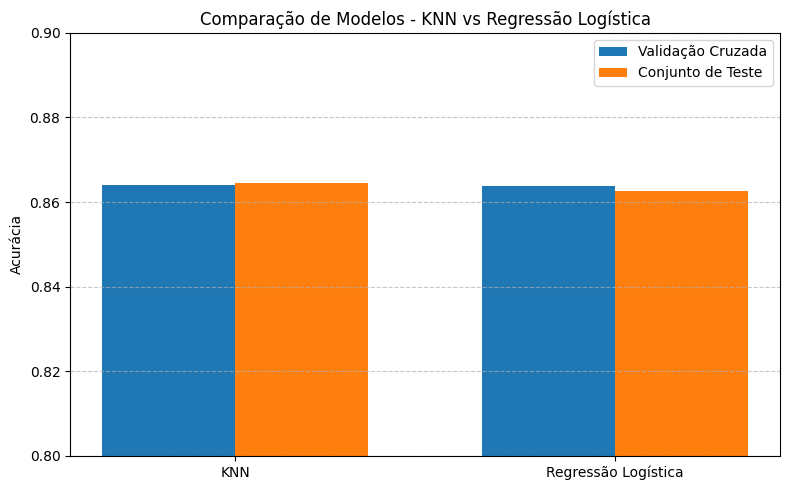

In [3]:
# ********************************************************************************
# ***                               RESPOSTA (A)                               ***
# ********************************************************************************
from sklearn.model_selection import cross_val_score
import numpy as np

# Melhor K encontrado na questão 2.D
K = 109

# Valor padrão para o número de folds. Escolheu-se este valor para obter um balanço
#   entre resposta e custo computacional
FOLDS = 5

# A validação cruzada divide o conjunto de dados em partes chamadas folds. Em cada iteração,
#    um fold é usado como conjunto de teste e os demais como treinamento. O modelo é treinado
#    e avaliado em cada rodada, e ao final, a média dos desempenhos obtidos define o desempenho geral.
# Como cada fold utiliza uma combinação diferente de dados, isso reduz o viés, melhora a avaliação
#    e permite um melhor aproveitamento do conjunto de dados.
model_knn = KNeighborsClassifier(n_neighbors=K)
cv_scores_knn = cross_val_score(model_knn, feature_train_scaled, target_train.values.ravel(), cv=FOLDS, scoring="accuracy")
print("Acurácia por fold (KNN):", cv_scores_knn)
print("Acurácia média (validação cruzada, KNN):", np.mean(cv_scores_knn))
model_knn.fit(feature_train_scaled, target_train.values.ravel())
target_pred_knn = model_knn.predict(feature_test_scaled)
accuracy_knn = accuracy_score(target_test, target_pred_knn)
print("Acurácia no conjunto de teste (KNN):", accuracy_knn)


# ********************************************************************************
# ***                               RESPOSTA (B)                               ***
# ********************************************************************************
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Mesmo número de folds do anterior
FOLDS = 5

# O algorítmo do modelo escolhido foi o de Regressão Logística (Logistic Regression)
model_lr = LogisticRegression(max_iter=1000, solver="liblinear", random_state=ALEATORIO)
cv_scores_lr = cross_val_score(model_lr, feature_train_scaled, target_train.values.ravel(), cv=FOLDS, scoring="accuracy")
print("\nAcurácia por fold (Regressão Logística):", cv_scores_lr)
print("Acurácia média (validação cruzada, Regressão Logística):", np.mean(cv_scores_lr))
model_lr.fit(feature_train_scaled, target_train.values.ravel())
target_pred_lr = model_lr.predict(feature_test_scaled)
accuracy_lr = accuracy_score(target_test, target_pred_lr)
print("Acurácia no conjunto de teste (Regressão Logística):", accuracy_lr)


# ********************************************************************************
# ***                               RESPOSTA (C)                               ***
# ********************************************************************************
import matplotlib.pyplot as plt

# Com as respostas da validação cruzada (modelos KNN e Regressão Logística), podemos
#   verificar que ambos possuem desempenho muito próximos. O KNN apresentou um
#   desempenho minimamente superior ao da Regressão Logística (0.8644 contra 0.8625)
models = ["KNN", "Regressão Logística"]
cv_scores_knn = [np.mean(cv_scores_knn), np.mean(cv_scores_lr)]
test_scores = [accuracy_knn, accuracy_lr]
x = np.arange(len(models))
width = 0.35
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, cv_scores_knn, width, label="Validação Cruzada")
plt.bar(x + width/2, test_scores, width, label="Conjunto de Teste")
plt.ylabel("Acurácia")
plt.title("Comparação de Modelos - KNN vs Regressão Logística")
plt.xticks(x, models)
plt.ylim(0.8, 0.9)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# ********************************************************************************
# ***                               RESPOSTA (D)                               ***
# ********************************************************************************

# Analisando o desempenho de ambos os modelos, temos que a acurácia média não difere muito
#   da acurácia do conjunto de testes em ambos os casos, o que mostra que não há indícios
#   de overfitting ou underfitting nos modelos desenvoldidos.
# Como não temos então overfitting ou underfitting, os modelos (KNN e Regressão Logística)
#   possuem um equilíbrio entre viés e variância.


## Questão 4

A. Calcule as principais métricas de avaliação sobre o conjunto de teste: precisão, recall, F1-score e AUC (área sob a curva ROC). Explique o que cada métrica indica sobre o comportamento do modelo selecionado.

B. Construa e interprete a matriz de confusão do modelo final, discutindo as implicações práticas dos erros cometidos, especialmente os falsos positivos e falsos negativos, em um contexto de triagem em saúde pública.

C. Realize uma busca por hiperparâmetros para o modelo escolhido (como a variação do K no KNN ou penalidade na regressão logística). Apresente a configuração adotada na busca e justifique as escolhas feitas.

D. Compare os resultados obtidos após a otimização com os da versão anterior do modelo. Avalie objetivamente se houve melhoria no desempenho e justifique a escolha final do modelo e de seus parâmetros.


Precisão (KNN): 0.61
Precisão (Regressão Logística): 0.52

Recall  (KNN): 0.07
Recall  (Regressão Logística): 0.16

F1-score  (KNN): 0.13
F1-score  (Regressão Logística): 0.24

AUC (KNN): 0.81
AUC (Regressão Logística): 0.82


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


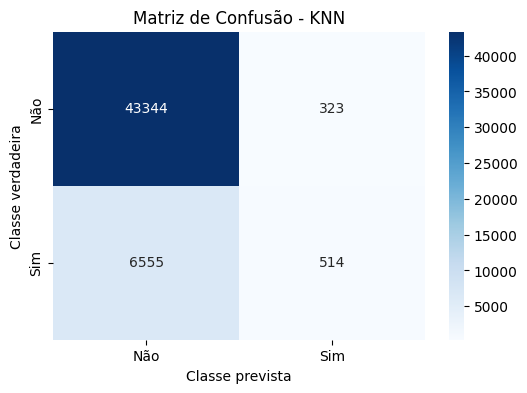

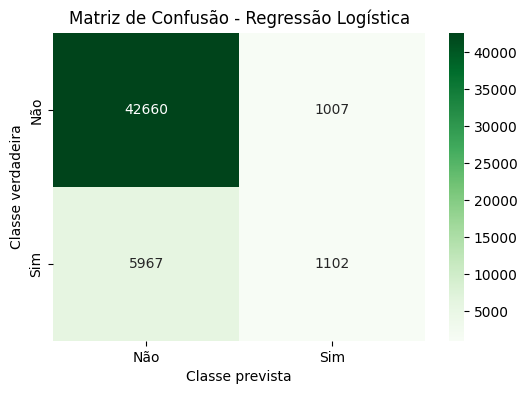

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/

Acurácia com solver=liblinear: 0.8625433617155471
Acurácia com solver=lbfgs: 0.8625827814569537
Acurácia com solver=newton-cg: 0.8625433617155471


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Acurácia com solver=sag: 0.8625433617155471
Acurácia com solver=saga: 0.8625039419741406

Melhor acurácia com solver=lbfgs: 0.8625827814569537


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [4]:
# ********************************************************************************
# ***                               RESPOSTA (A)                               ***
# ********************************************************************************
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Precisão é a métrica de quantos verdadeiros positivos estão corretos nas previsões feitas pelo modelo.
precision_knn = precision_score(target_test, target_pred_knn)
precision_lr  = precision_score(target_test, target_pred_lr)
print(f"Precisão (KNN): {precision_knn:.2f}")
print(f"Precisão (Regressão Logística): {precision_lr:.2f}")

# Recall é a métrica de quanto o modelo consegue identificar previsões positivas.
recall_knn = recall_score(target_test, target_pred_knn)
recall_lr  = recall_score(target_test, target_pred_lr)
print(f"\nRecall  (KNN): {recall_knn:.2f}")
print(f"Recall  (Regressão Logística): {recall_lr:.2f}")

# F1-score é a métrica que provê um único número que representa o balanço entre precisão e recall.
f1_knn = f1_score(target_test, target_pred_knn)
f1_lr  = f1_score(target_test, target_pred_lr)
print(f"\nF1-score  (KNN): {f1_knn:.2f}")
print(f"F1-score  (Regressão Logística): {f1_lr:.2f}")

# AUC é a métrica de quanto o modelo consegue separar os positivos dos negativos,
#   sendo 0.5 um modelo ruim e 1.0 um modelo perfeito.
target_proba_knn = model_knn.predict_proba(feature_test_scaled)[:, 1]
auc_knn = roc_auc_score(target_test, target_proba_knn)
target_proba_lr = model_lr.predict_proba(feature_test_scaled)[:, 1]
auc_lr = roc_auc_score(target_test, target_proba_lr)
print(f"\nAUC (KNN): {auc_knn:.2f}")
print(f"AUC (Regressão Logística): {auc_lr:.2f}")


# ********************************************************************************
# ***                               RESPOSTA (B)                               ***
# ********************************************************************************
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_knn = confusion_matrix(target_test, target_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Não", "Sim"], yticklabels=["Não", "Sim"])
plt.xlabel("Classe prevista")
plt.ylabel("Classe verdadeira")
plt.title("Matriz de Confusão - KNN")
plt.show()

cm_lr = confusion_matrix(target_test, target_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Greens", xticklabels=["Não", "Sim"], yticklabels=["Não", "Sim"])
plt.xlabel("Classe prevista")
plt.ylabel("Classe verdadeira")
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

# A comparação da matriz de confusão para o modelo KNN com o modelo da Regressão
#   Logística mostra que o KNN apresenta menos falsos negativos, ou seja, o modelo
#   erra menos ao apontar que uma pessoa não tem diabetes quando de fato esta pessoa
#   tem. Por outro lado, o KNN possui mais falso positivos, ou seja, aponta que a
#   pessoa possui diabetes quando de fato não tem.
# Em um contexto de saúde pública, é melhor apontar menos falsos negativos, pois
#   uma pessoa com diagnóstico negativo de diabetes não irá se tratar e colocar a 
#   vida em risco. Um diagnóstico de falso positivo fará a pessoa se desgastar com
#   tratamento desnecessário, mas não colocará a vida em risco.


# ********************************************************************************
# ***                               RESPOSTA (C)                               ***
# ********************************************************************************

# Como visto na resposta da questão 2.D, o hiperparâmetro escolhido para o modelo
#   KNN foi o valor de K=109.

# Para o modelo utilizando o algorítmo de Regressão Logística, foi alterado o solver
#   para comparar com acurácia do modelo KNN.
list_solver = ["liblinear", "lbfgs", "newton-cg", "sag", "saga"]
melhor_solver = ""
melhor_accuracy = 0
for s in list_solver:
    model = LogisticRegression(max_iter=1000, solver=s, random_state=ALEATORIO)
    model.fit(feature_train_scaled, target_train.values.ravel())
    target_pred = model.predict(feature_test_scaled)
    accuracy = accuracy_score(target_test, target_pred)
    print(f"Acurácia com solver={s}: {accuracy}")
    if accuracy > melhor_accuracy:
        melhor_accuracy = accuracy
        melhor_solver = s
print(f"\nMelhor acurácia com solver={melhor_solver}: {melhor_accuracy}")


# ********************************************************************************
# ***                               RESPOSTA (D)                               ***
# ********************************************************************************

# A melhor acurácia foi obtida com o uso do algorítmo KNN com K=109: 0.864435509303059.
#   Mesmo considerando a validação cruzada, a acurácia no conjunto de teste do KNN
#   foi de 0.864435509303059.
# A melhor acurácia do algorítmo de Regressão Logística foi com uso do solver "lbfgs",
#   resultando em uma acurácia de 0.8625827814569537. Com este resultado, o modelo final
#   escolhido foi o de KNN com o uso do hiperparâmetro K=109.
